In [1]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots

# Coleta e Preparo dos dados

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/CelioMaciel179/eda_stars/main/datasets/star_dataset.csv')

df.head()

Name  Distance (ly)  Luminosity (L/Lo)  Radius (R/Ro)  \
0          Altair      16.594171           9.979192       1.632650   
1           Deneb    2600.490723      196002.627856     202.970526   
2  Barnard's Star       6.052616           4.893716       0.222711   
3         Polaris     322.601002        2196.241934      37.546813   
4  Barnard's Star       5.902392          -1.496486       0.192359   

   Temperature (K) Spectral Class  
0      7509.294247            A7V  
1      8503.284796           A2Ia  
2      3165.959639           M4Ve  
3      6048.326915           F7Ib  
4      3130.602069           M4Ve

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1000 non-null   object 
 1   Distance (ly)      1000 non-null   float64
 2   Luminosity (L/Lo)  1000 non-null   float64
 3   Radius (R/Ro)      1000 non-null   float64
 4   Temperature (K)    1000 non-null   float64
 5   Spectral Class     1000 non-null   object 
dtypes: float64(4), object(2)
memory usage: 47.0+ KB


In [4]:
df.isnull().sum()

Name                 0
Distance (ly)        0
Luminosity (L/Lo)    0
Radius (R/Ro)        0
Temperature (K)      0
Spectral Class       0
dtype: int64

In [5]:
df.duplicated().sum()

0

# EDA

In [6]:
df.describe()

Distance (ly)  Luminosity (L/Lo)  Radius (R/Ro)  Temperature (K)
count    1000.000000        1000.000000    1000.000000      1000.000000
mean      295.505327       19644.909442      86.960696      9983.486779
std       541.478403       42223.595017     213.850005      7906.973529
min         3.877798          -4.993141       0.068087      2750.183163
25%        11.716853          10.441039       1.664479      3940.020856
50%        52.031435         171.097809       5.845444      7379.007975
75%       322.865874       10500.577117      33.719778     12055.975095
max      2600.490723      196004.854081     887.097936     28044.279272

In [7]:
def create_distribution_boxplot(data, column):
    
    hist = px.histogram(data, x=column, nbins=30)
    hist.update_traces(marker_color='indianred')

    
    box = px.box(data, y=column)
    box.update_traces(marker_color='indianred')

    
    fig = make_subplots(rows=1, cols=2, subplot_titles=[f'Distribuition of {column}', f'Boxplot of {column}'])

    
    fig.add_trace(hist['data'][0], row=1, col=1)

    
    fig.add_trace(box['data'][0], row=1, col=2)

    
    fig.update_layout(title_text=f'{column}', showlegend=False, xaxis_title=column, yaxis_title='Count')
    fig.update_xaxes(title_text=column, row=1, col=1)
    fig.update_xaxes(title_text='', row=1, col=2)
    fig.update_yaxes(title_text='Contagem', row=1, col=1)
    fig.update_yaxes(title_text='', row=1, col=2)

    fig.show()

## Distribuição e bosplots para variáveis nuemricas

In [8]:
create_distribution_boxplot(df, 'Temperature (K)')

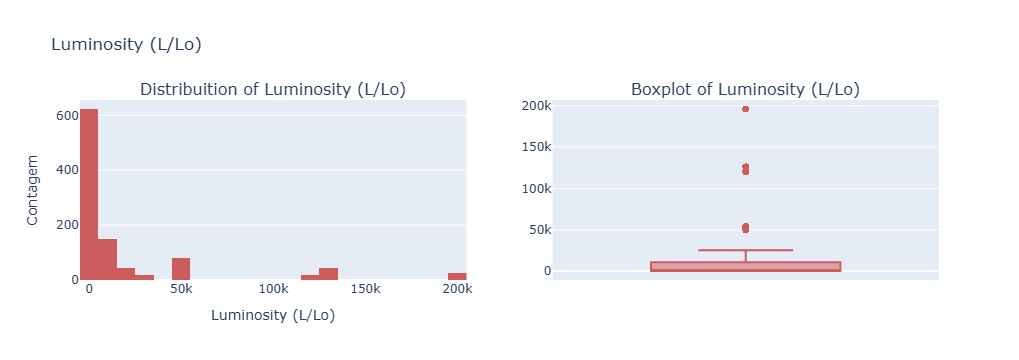

In [9]:
create_distribution_boxplot(df, 'Luminosity (L/Lo)')

In [10]:
create_distribution_boxplot(df, 'Radius (R/Ro)')

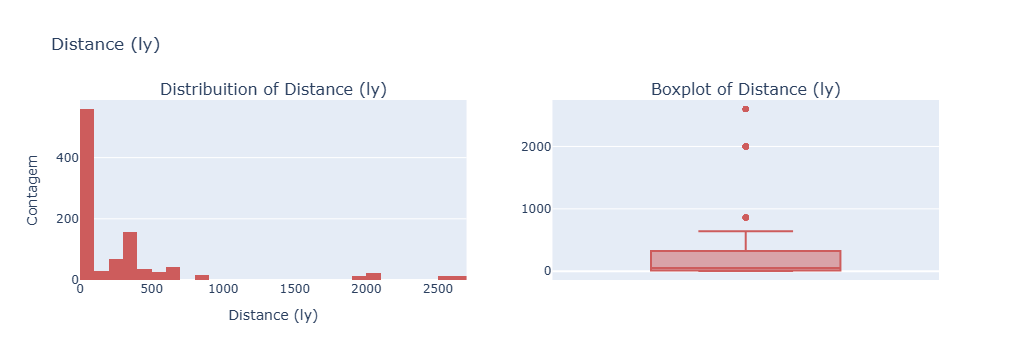

In [11]:
create_distribution_boxplot(df, 'Distance (ly)')

## Distribuition of Spectral Class

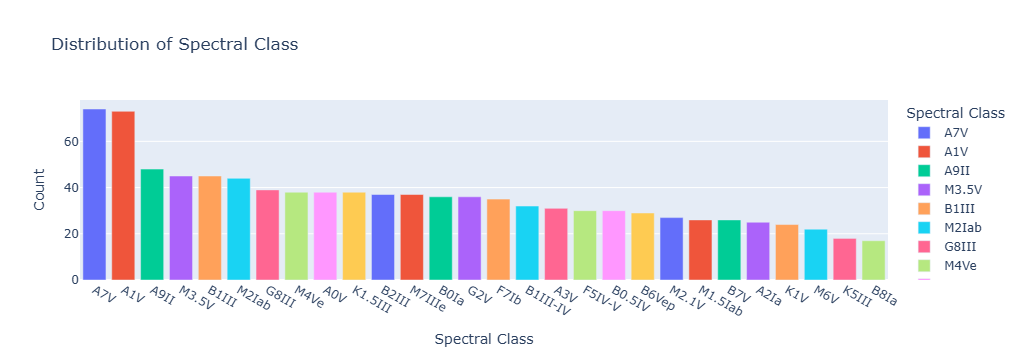

In [12]:
spectral_class_counts = df['Spectral Class'].value_counts().reset_index()
spectral_class_counts.columns = ['Spectral Class', 'Count']

spectral_class_distribution = px.bar(spectral_class_counts, 
                                     x='Spectral Class',
                                     y='Count',
                                     title='Distribution of Spectral Class',
                                     labels={'Spectral Class': 'Spectral Class', 'count': 'Count'},
                                     color='Spectral Class')

spectral_class_distribution.show()

## Correlation Matrix

In [13]:
corr_matrix = df[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Distance (ly)']].corr()
heatmap_corr = px.imshow(corr_matrix, text_auto=True, title='Correlation Matrix')
heatmap_corr.show()

## Gráfico de dispersão

In [14]:
scatter_temp_lum = px.scatter(df, x='Temperature (K)', y='Luminosity (L/Lo)',
                              title='Temperatura vs Luminosidade', labels={'Temperature (K)': 'Temperatura (K)', 'Luminosity (L/Lo)': 'Luminosidade (L/Lo)'})
scatter_temp_lum.show()

In [15]:
scatter_temp_radius = px.scatter(df, x='Temperature (K)', y='Radius (R/Ro)',
                                 title='Temperatura vs Raio', labels={'Temperature (K)': 'Temperatura (K)', 'Radius (R/Ro)': 'Raio (R/Ro)'})
scatter_temp_radius.show()

In [16]:
scatter_lum_radius = px.scatter(df, x='Luminosity (L/Lo)', y='Radius (R/Ro)',
                                title='Luminosidade vs Raio', labels={'Luminosity (L/Lo)': 'Luminosidade (L/Lo)', 'Radius (R/Ro)': 'Raio (R/Ro)'})
scatter_lum_radius.show()

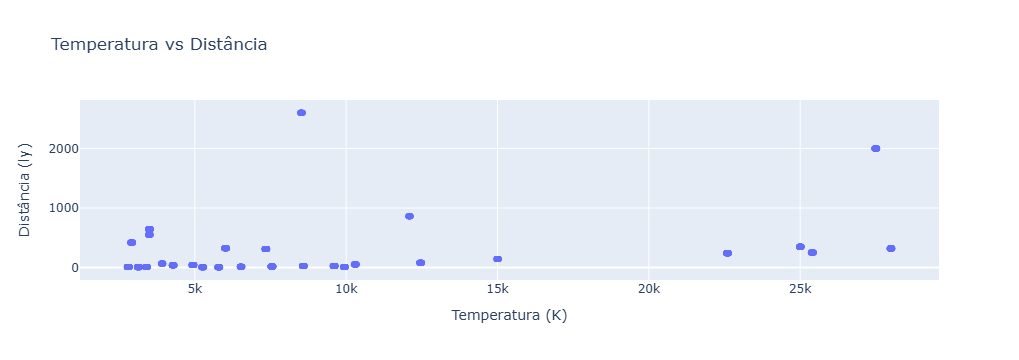

In [17]:
scatter_temp_distance = px.scatter(df, x='Temperature (K)', y='Distance (ly)',
                                   title='Temperatura vs Distância', labels={'Temperature (K)': 'Temperatura (K)', 'Distance (ly)': 'Distância (ly)'})
scatter_temp_distance.show()

## Distribuição da Distância por Classe Espectral

In [18]:
import plotly.express as px

fig = px.box(df, x='Spectral Class', y='Distance (ly)', 
             title='Distribuição da Distância por Classe Espectral',
             labels={'Spectral Class': 'Classe Espectral', 'Distance (ly)': 'Distância (anos-luz)'})
fig.show()
